In [1]:
%load_ext autoreload
%autoreload 2

from simphony.libraries.ideal import Waveguide, Coupler
from simphony.circuit import Circuit
from simphony.simulation import QuantumSim, QuantumResult, CoherentState, SqueezedState, TwoModeSqueezed, compose_qstate
from simphony.simulation import ClassicalSim, Laser, Detector
from simphony.utils import polar
import numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
def coupler_factory():
    wg0 = Waveguide(length=1)
    wg1 = Waveguide(length=1)
    coupler = Coupler()
    coupler = Coupler(loss=-3, coupling=0.5, phi=jnp.pi/2)
    ckt = Circuit()
    ckt.connect(coupler.o(2), wg0.o(0))
    ckt.connect(coupler.o(3), wg1.o(0))
    ckt.expose(ckt._oports)
    return ckt
ckt = coupler_factory()
# print(pd.DataFrame(ckt.s_params(jnp.array([1.55]))[0]))
# input = TwoModeSqueezed(2, 10, 10, ckt.o(0), ckt.o(1))
# coh1 = CoherentState(ckt.o(0), 1+2j)
# coh2 = CoherentState(ckt.o(1), -3-1j)
# input = compose_qstate(coh1, coh2)
s1 = SqueezedState(ckt.o(0), 2, 0)
s2 = SqueezedState(ckt.o(1), 2, jnp.pi/4)
input = compose_qstate(s1, s2)
sim = QuantumSim(ckt, wl=jnp.array([1.55]), input=input)
res = sim.run()
display(pd.DataFrame(res.input_means).T)
display(pd.DataFrame(res.means))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3 3 8


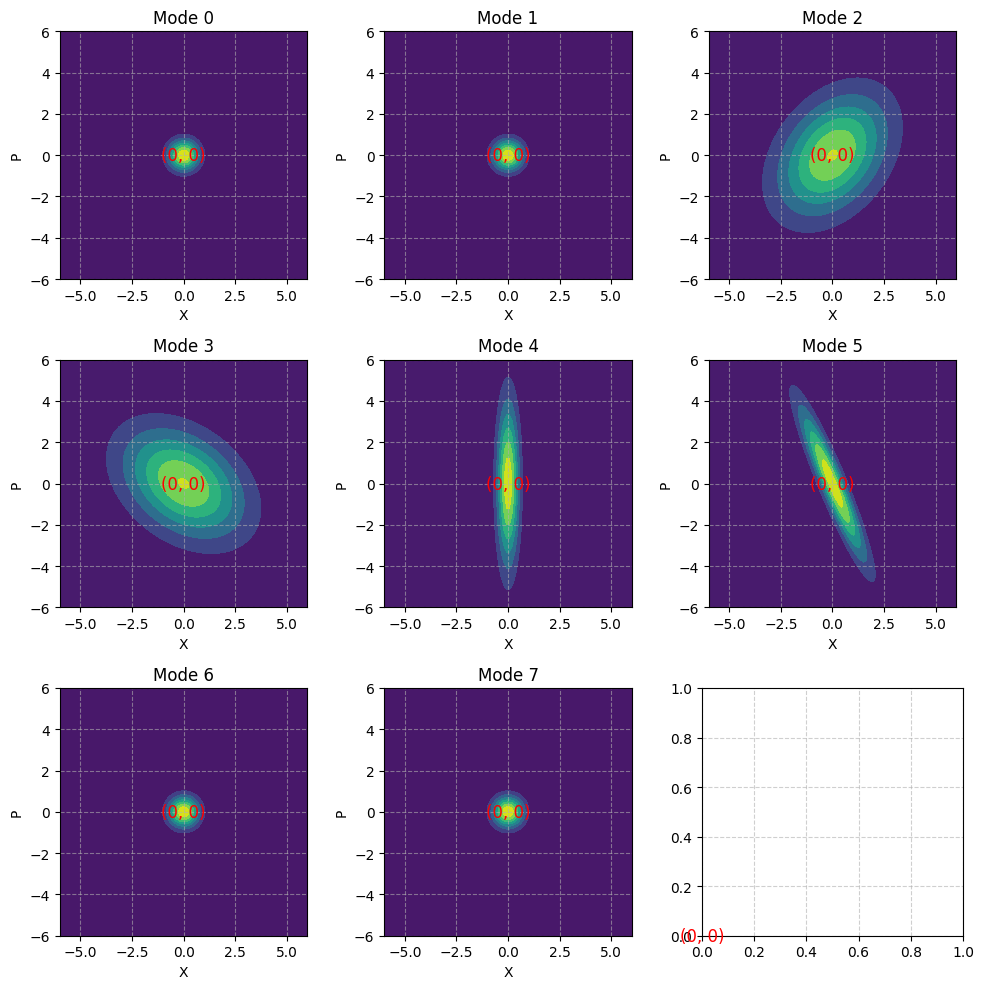

In [114]:
from simphony.simulation.quantum import plot_quantum_result
axs = plot_quantum_result(res, include_loss_modes=True)
for ax in axs:
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.text(0, 0, '(0, 0)', fontsize=12, color='red', ha='center', va='center')
plt.tight_layout()
plt.show()

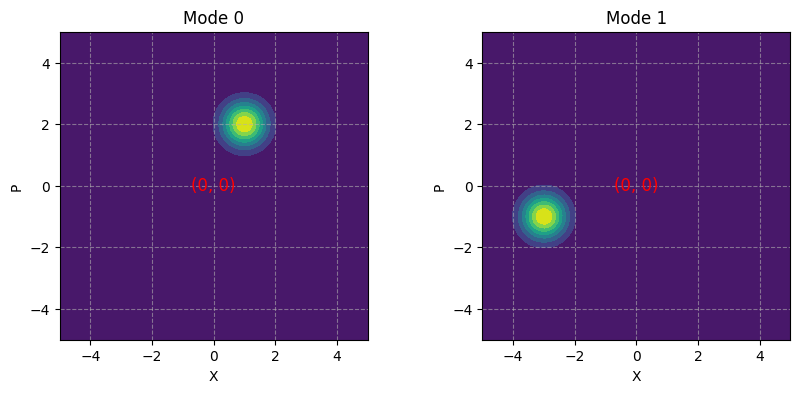

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
input.plot_mode(0, x_range=(-5, 5), y_range=(-5, 5), ax=axes[0])
input.plot_mode(1, x_range=(-5, 5), y_range=(-5, 5), ax=axes[1])
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.text(0, 0, '(0, 0)', fontsize=12, color='red', ha='center', va='center')
plt.show()

<Axes: title={'center': 'Mode 1'}, xlabel='X', ylabel='P'>

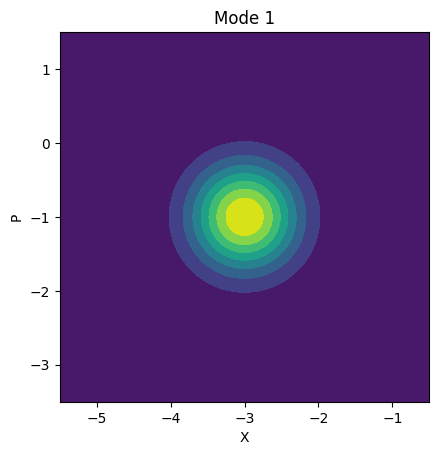

In [61]:
input.plot_mode(1)